# Imports

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("card_credit_fraud.csv", delimiter=";", decimal=",")
df.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
le = LabelEncoder()

df['type_encoded'] = le.fit_transform(df['type'])
df.drop(["type", "nameOrig", "nameDest"], inplace=True, axis=1)
df.head()

,transactionId,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,3
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,3
2,2,1,181.00,181.0,0.00,0.0,0.0,1,4
3,3,1,181.00,181.0,0.00,21182.0,0.0,1,1
4,4,1,11668.14,41554.0,29885.86,0.0,0.0,0,3


In [4]:
X, y = df.drop(["isFraud"], axis=1), df["isFraud"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_1 = X_train_2 = X_train

y_train_1 = y_train_2 = y_train

X_test_1 = X_test_2 = X_test

y_test_1 = y_test_2 = y_test

In [7]:
scoring = make_scorer(accuracy_score)

grid_parameters = {"n_neighbors" : [1,2,3], "weights" : ["uniform", "distance"]}

grid_search = GridSearchCV(KNeighborsClassifier(), grid_parameters, scoring=scoring, cv=5, n_jobs=-1)

grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score, response_method='predict'))

In [8]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'n_neighbors': 2, 'weights': 'uniform'}
Best score: 0.999391662388031


In [9]:
y_pred_1 = grid_search.predict(X_test)
cm_1 = confusion_matrix(y_test_1, y_pred_1)

In [10]:
cm_1

array([[250011,      9],
       [   101,   1933]], dtype=int64)

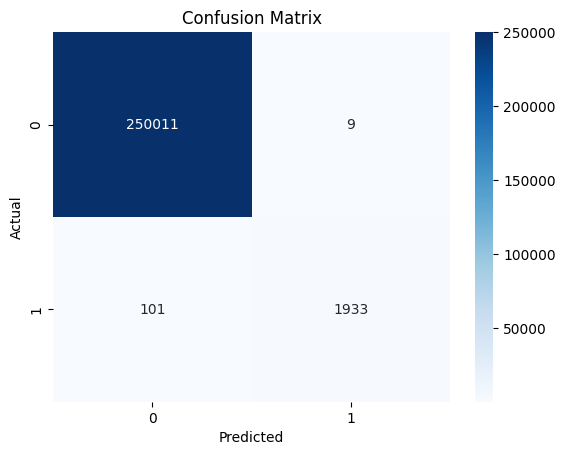

In [11]:
# Create a heatmap using Seaborn
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

In [16]:
fpr1, tpr1, thresh1 = roc_curve(y_test_1, y_pred_1, pos_label=1)

roc_auc_score(y_test_1, y_pred_1)


0.9751540761694817

# Traçage courbe ROC

[Article](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

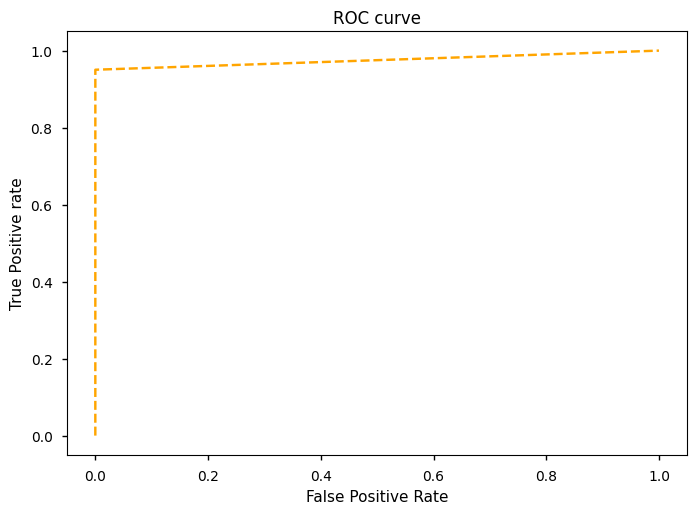

In [13]:
plt.style.use('seaborn-v0_8-notebook')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

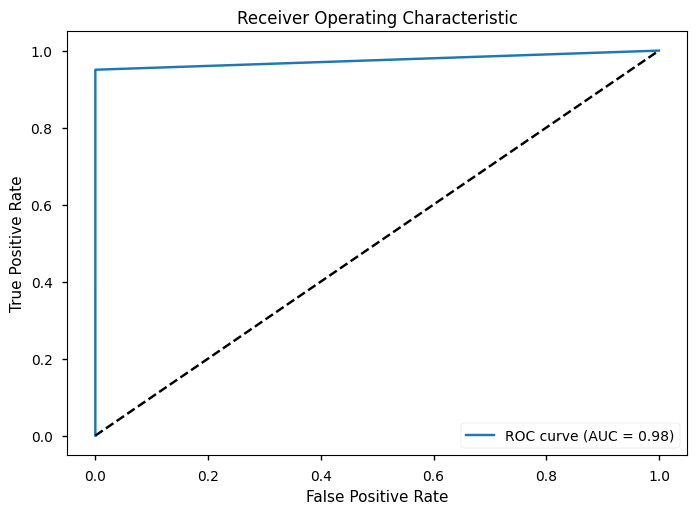

In [18]:
# Assuming y_true contains the true labels and y_pred contains the predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_1)
auc_score = roc_auc_score(y_test_1, y_pred_1)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()